In [2]:
import os
import sys
import time
import datetime
import math

import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf

# Enable Eager Execution
#tf.enable_eager_execution()
#tf.executing_eagerly() 

import warnings
warnings.filterwarnings("ignore")

In [2]:
### Tải dữ liệu lên

In [3]:
pd.options.display.max_colwidth=1000
train_df = pd.read_csv('data/train.csv')
train_df.head()

,id,text,class
0,dee6dfc5,"Đến quán 2 lần thôi , rất là thích !\nQuán tuy nằm trong hẻm nhưng rất dễ tìm , quán rộng_rãi thoáng mát sạch_sẽ .\nNhân_viên phục_vụ nhiệt_tình , siêu dễ_thương .\nThực_đơn phong_phú đa_dạng , giá siêu rẻ .\nThức_ăn nêm nếm hợp_khẩu vị , ngon_miệng .\nDesert ngọt vừa , không quá ngấy , rất ngon .\nTrà sữa , uyên_ương thơm và đúng vị mình đã từng uống ở HongKong .\nNói_chung điểm 10 cho chất_lượng , thích quán lắm !",1
1,800813f5,Đến quán vào tối chủ_nhật . Có band hát . Khá ổn . Tuy_nhiên không_gian tầng 1 hơi hẹp . Ngồi cả ra vỉa_hè . Đồ uống ko ngon lămz,0
2,6553e47f,Phục_vụ lâu quá mặc_dù khách rất vắng .\nĐợi gần 15p mới mang được ly cà_phê ra . Ông này chỉ khéo quảng_bá chứ với mình chắc không quay lại_nữa .,0
3,b45a1ff1,"Ko gian bé_tí , quán chật_chội , đông người nên phục_vụ chưa tốt . Đồ uống bình_thường ( đặc_biệt khi so với giá_cả ) và ko có gì đặc_sắc cả .",0
4,f92694b0,"Khi mình order , đặt bánh thì nhận được sự tiếp_đãi , tư_vấn và nói_chuyện rất gần_gũi , rất nhiệt_tình .\nBánh thì rất tuyệt , nhân béo , rau_câu không dùng phẩm . Sau_này có dịp sinh_nhật , mình sẽ order mẫu lớn .\nChúc các bạn làm_ăn phát_đạt !",1


In [4]:
print(len(train_df))

67022


In [4]:
test_df = pd.read_csv('../input/test.csv')
test_df.head()

,id,text
0,2017ec48,"Mình kêu 6 loại khác nhau , mỗi laoij 1 cục mà ăn cái nào cũng như nhau , cứ như đang ăn 1 loại vậy . Cuối cùng ngon nhất lại là cục khoai môn chiên . Mấy loại há cảo xíu mại bánh xẹp ăn ngán cực kỳ , mà làm cục to tổ bố để ép khách mua với cái giá 19k . Ko hiểu ăn được cái gì ở đây mà có người khen ngon"
1,e3f0ea32,"Ăn ở đây từ trc khi chủ nhà xây nhà mới . chất lg ko đổi còn giá có tăng từ từ 1-2k : ) )\r\nphần mìh kiu là 2 thường 2 trứng 22k - hơi no tẹo và CỰC KÌ NGONNN > <\r\nđi vạn kiếp rẽ vào hẻm có biển hoa đàm ni tự và đi chừng 50m là tới , vì hẻm 2m nên để xe bên ngoài dọc theo 2 dãy nhà , chú chủ sẽ sắp xếp xe lại nhưng mình khuyến khích các b mua về : ) ) ăn tại chỗ thì bàn ghế sạch sẽ , ly uống nước là loại dùng 1 lần - > kết điểm này ! ! !\r\nphục vụ của 2 vk ck chủ thì miễn bàn , cực kì thân thiện . dạo này có 1 cô nữa phụ bán nhưng ko dc lanh lẹ lắm .\r\n* quán chỉ bán buổi sáng tới chừng 9-10g là hết . lâu lâu thì 11g .\r\n* hành phi tự làm ngon và giòn lắm nhé ^ ^ còn bánh cuốn thì gọi tới đâu làm tới đó , ko qá lâu và bánh còn ấm ."
2,8743eae3,"Các bạn đến ăn ngay và luôn đi nhé ! !\r\nMình từ trước giờ chỉ Súp cua Súp óc heo làm tới , từ khi tới quán , mình đã biết thêm nhiều loại khác ( rong biển , hến , thập cẩm , . . mới đây còn có thêm súp còi điệp ) . Không chỉ có súp không âu nha , nhìn menu mà món nào cũng muôn ăn ... Ah , bánh Flan trà xanh cực ngon luôn , món khoái khẩu của mình ấy ... Mình không có thói quen chộp hình thức ăn trước khi ăn , nên các bạn đến ngay SÚP SÀI GÒN Q4 và cảm nhận nhé ^ ^"
3,7b554248,"Đây gần như quán ruột của mình luôn : ) ) đây đồ ăn ngon , nhân viên dễ thương , mấy anh giữ xe phía ngoài cũng dễ thương ko kém : ) ) giá cả thì hợp lý khỏi bàn luôn rồi . Đây là 3 món ruột , lần nào đến cũng phải ăn : ) ) ) hahaaa"
4,bedd1403,"Tiếc là 25 năm sống ở Tây Ninh thì đây là lần đầu tiên mình ghé .\r\nThức ăn rất Việt Nam , ngon và vị tuyệt vời , giá hợp lý .\r\nKhuyết điểm :\r\nGiờ cơm trưa quán đắc nên đợi rất lâu ,\r\nMình quên giử số điện thoại để đặt chổ và thức ăn trước , a e ai ghé thì thêm vào giúp .\r\nHơi nóng , và chắc vì quán đông quá nên phần mỷ quan có điễm trừ ,"


In [6]:
words_list = np.load('../input/words_list.npy')
print('Prunned vocabulary loaded!')
words_list = words_list.tolist()
word_vectors = np.load('../input/word_vectors.npy')
word_vectors = np.float32(word_vectors)
print ('Word embedding matrix loaded!')

Prunned vocabulary loaded!
Word embedding matrix loaded!


In [7]:
train_ids = np.load('../input/train_ids.npy')

In [8]:
train_x, test_validation_x, train_y, test_validation_y  = train_test_split(train_ids, train_df['class'], test_size=0.2, random_state=2019)
validation_x, test_x, validation_y, test_y = train_test_split(test_validation_x, test_validation_y, test_size=0.5, random_state=2018)

In [9]:
BATCH_SIZE = 256

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)) # train_x, train_y
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_x, validation_y)) # validation_x, validation_y
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)) # test_x, test_y

train_dataset = train_dataset.batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [11]:
for idx, (x,y) in enumerate(train_dataset):
    if idx == 0:
        print('FIRST BATCH:')
        print('X =',x)
        print('y =',y)
print("Total: ", idx)

FIRST BATCH:
X = tf.Tensor(
[[12844  5596  4884 ...     0     0     0]
 [10774 16521 13952 ...     0     0     0]
 [ 7446 10698 10774 ...     0     0     0]
 ...
 [ 4884 16995  4601 ...     0     0     0]
 [ 3913 15085 14017 ...     0     0     0]
 [ 4788 14598   310 ...     0     0     0]], shape=(256, 200), dtype=int32)
y = tf.Tensor(
[0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0
 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1], shape=(256,), dtype=int32)
Total:  84


In [12]:
class SentimentAnalysisModel(tf.keras.Model):
    """
    Mô hình phân tích cảm xúc của câu
    
    Properties
    ----------
    word2vec: numpy.array
        word vectors 
    lstm_layers: list
        list of lstm layers, lstm cuối cùng sẽ chỉ trả về output của lstm cuối cùng
    dropout_layers: list
        list of dropout layers
    dense_layer: Keras Dense Layer
        lớp dense layer cuối cùng nhận input từ lstm, 
        đưa ra output bằng số lượng class thông qua hàm softmax
    """
    def __init__(self, word2vec, lstm_units, n_layers, num_classes, dropout_rate=0.25):
        """
        Khởi tạo mô hình
        
        Paramters
        ---------
        word2vec: numpy.array
            word vectors 
        lstm_units: int
            số đơn vị lstm
        n_layers: int
            số layer lstm xếp chồng lên nhau
        num_classes: int
            số class đầu ra
        dropout_rate: float
            tỉ lệ dropout giữa các lớp
        """
        super().__init__(name='sentiment_analysis')
        
        # Khởi tạo các đặc tính của model
        self.word2vec = word2vec
        
        self.lstm_layers = []  # List chứa các tầng LSTM
        self.dropout_layers = []  # List chứa các tầng dropout

        ### TODO 3.1
        # Vòng lặp dưới chạy qua N tầng trong stack
        # mỗi tầng sẽ có 1 lstm_layer và 1 dropout_layer
        # 
        # Khởi tạo lstm_layer (GPU) với các tham biến sau:
        # lstm_layer(units=..., return_sequences=[True/False])
        # Tham khảo: https://keras.io/layers/recurrent/#cudnnlstm
        #
        # Khởi tạo lstm_layer (CPU) với các tham biến sau:
        # lstm_layer(units=..., return_sequences=[True/False])
        # Tham khảo: https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
        # 
        # LƯU Ý:
        # return_sequence của lstm_layer nhận giá trị True ở mọi tầng  
        # trong stack, ngoại trừ tầng cuối cùngg
        #
        # Khởi tạo dropout_layer với các tham biến sau:
        # new_dropout = tf.keras.layers.Dropout(rate=...)
        # Tham khảo: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
        # 
        # Sau khi khởi tạo lstm_layer và dropout_layer
        # hãy thêm chúng vào 2 list tương ứng
        # self.lstm_layers và self.dropout_layers
        #
        # Cuối cùng, khởi tạo tầng fully-connected/dense
        # tf.keras.layers.Dense(num_classes=..., activation=' ')
        # Tham khảo: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
        #
        ### START CODE HERE
        
        for i in range(n_layers):
            new_lstm = tf.keras.layers.LSTM(units=lstm_units, return_sequences=True)
            self.lstm_layers.append(new_lstm)
            new_dropout = tf.keras.layers.Dropout(rate=dropout_rate)
            self.dropout_layers.append(new_dropout)
          
        #Tầng cuối cùng  
        new_lstm = tf.keras.layers.LSTM(units=lstm_units, return_sequences=False)
        self.lstm_layers.append(new_lstm)
        
        self.dense_layer = tf.keras.layers.Dense(num_classes, activation="softmax")
        ### END CODE HERE
        
    def call(self, inputs):
        ### TODO 3.2
        # Thực hiện các bước biến đổi khi truyền thuận input qua mạng
        # Điền code vào các đoạn pass
        ### START CODE HERE
        inputs = tf.cast(inputs, tf.int32)
        # Input hiện là indices, cần chuyển sang dạng vector
        # sử dụng:
        # tf.nn.embeddings_lookup(embeddings, indices)
        
        x = tf.nn.embedding_lookup(self.word2vec, inputs)
      
        # Truyền thuận inputs lần lượt qua các tầng
        # ở mỗi tầng, truyền input qua các layer: lstm > dropout
        # vd: x = first_lstm(x)
        #     x = first_dropout(x)
        #     x = second_lstm(x)
        #     v.v.
        n_layers = len(self.dropout_layers)
        
        for i in range(n_layers):
          x = self.lstm_layers[i](x)
          x = self.dropout_layers[i](x)
          
        x = self.lstm_layers[-1](x)
          
        x = self.dense_layer(x)
             
        # Gán giá trị tầng cuối cùng vào out và trả về
        out = x
        
        return out
        ### END CODE HERE

In [13]:
LSTM_UNITS = 128
N_LAYERS = 2
NUM_CLASSES = 2

In [14]:
model = SentimentAnalysisModel(word_vectors, LSTM_UNITS, N_LAYERS, NUM_CLASSES)

In [15]:
LEARNING_RATE = 0.001
EPOCHS = 100

In [16]:
import tensorflow.compat.v1 as tf
optimizer = tf.train.AdamOptimizer(LEARNING_RATE)

In [17]:
global_step = tf.train.get_or_create_global_step()
# Thư mục chứa checkpoint
checkpoint_dir = './model'
# Mẫu tên checkpoint
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{score}")

In [18]:
from fastprogress import master_bar, progress_bar

In [19]:
def epoch_training(model, dataset, global_step, mb, num_step):
    """
    Huấn luyện mô hình qua 1 epoch
    
    Parameters
    ----------
    model: tf.keras.Model
        model cần huấn luyện
    dataset: tf.Dataset
        dataset dùng để huấn luyện
    global_step: global step 
    mb: fastprogress.master_bar
        thanh biểu diễn tiến độ
    num_step: int
        số bước lặp trong mỗi epoch
    Returns
    -------
    float
        Giá trị loss trung bình của epoch
    """
    train_losses = [] # Chứa giá trị loss của các batch
    dataset_iter = iter(dataset)
    for _ in progress_bar(range(num_step), parent=mb):
        inp, target = next(dataset_iter)
        
        with tf.GradientTape() as tape:
            ### TODO 4.1
            # Truyền thuận - Feedforward
            # Để tạo giá trị predictions
            ### START CODE HERE
            predictions = model(inp)
            ### END CODE HERE
            
            ### TODO 4.2
            # Sử dụng tf.losses.sparse_softmax_cross_entropy để tính loss
            # Tham khảo: https://www.tensorflow.org/versions/r1.14/api_docs/python/tf/losses/sparse_softmax_cross_entropy
            ### START CODE HERE
            loss = tf.losses.sparse_softmax_cross_entropy(labels=target, logits=predictions)
            ### END CODE HERE
          
            # Thêm loss của batch vào train_losses
            train_losses.append(loss)
            
        
        
        ### TODO 4.3
        #  Truyền ngược - Backprop: tính gradient của loss
        # theo các tham số mô hình (model.trainable_variables)
        # sử dụng tape.gradient
        # Tham khảo: https://www.tensorflow.org/api_docs/python/tf/GradientTape#gradient
        ### START CODE HERE
        grads = tape.gradient(train_losses, model.trainable_variables)
        ### END CODE HERE
        
        ### TODO 4.4
        # Dùng gradient để tối ưu các tham số
        # sử dụng optimizer.apply_gradients
        # vd: optimizer.apply_gradients(zip(dloss_over_dvars, vars), global_step = global_step)
        # LƯU Ý: Không cần gán giá trị của optimizer.apply_gradients cho biến
        # Tham khảo: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer#apply_gradients
        ### START CODE HERE
        optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step=global_step)
        ### END CODE HERE
        
        mb.child.comment = 'Train loss {:.4f}'.format(loss)
        
    # Trả về loss trung bình
    return sum(train_losses)/ len(train_losses)

In [20]:
def epoch_evaluation(model, dataset, mb, num_step):
    """
    Đánh giá mô hình qua 1 epoch
    
    Parameters
    ----------
    model: tf.keras.Model
        model cần đánh giá
    dataset: tf.Dataset
        dataset cần đánh giá
    mb: fastprogress.master_bar
        progess bar
    num_step: int
        số bước lặp trong mỗi epoch
    Returns
    -------
    float
        Giá trị loss trung bình của epoch
    float
        Giá trị F1-score trên tập validation
    """
    val_losses = []   # Chứa giá trị loss của các batch
    val_gt = []       # Chứa giá trị nhãn thật của tập validation , gt = groundtruth
    val_pred = []     # Chứa giá trị nhãn dự đoán do model trên tập validation
    dataset_iter = iter(dataset)
    for _ in progress_bar(range(num_step), parent=mb):
        inp, target = next(dataset_iter)
        
        val_gt.extend(target.numpy().astype(np.int32).tolist())
        ### TODO 5.1
        # Truyền thuận
        # để lấy predictions
        ### START CODE HERE
        predictions = model(inp)
        ### END CODE HERE
        
        ### TODO 5.2
        # Tính loss giữa target và predictions
        # sử dụng hàm loss sparse_softmax_cross_entropy
        # như TODO 4.2
        ### START CODE HERE
        loss = tf.losses.sparse_softmax_cross_entropy(labels=target, logits=predictions)
        ### END CODE HERE
        
        
        # Thêm loss vào val_losses
        val_losses.append(loss)
        
        val_pred.extend(tf.argmax(predictions,1).numpy().astype(np.int32).tolist())
        
        mb.child.comment = 'Validation loss {:.4f}'.format(loss)
    
    # Trả về loss trung bình và F1-score
    return sum(val_losses)/ len(val_losses), f1_score(val_gt, val_pred)

In [21]:

if tf.test.is_gpu_available():
    print('Using GPU LSTM')
    lstm_layer = tf.keras.layers.CuDNNLSTM
else:
    print('Using CPU LSTM')
    import functools
    lstm_layer = functools.partial(
            tf.keras.layers.LSTM, recurrent_activation='sigmoid')

Using GPU LSTM


In [22]:
model.call()
model.summary()

TypeError: call() missing 1 required positional argument: 'inputs'

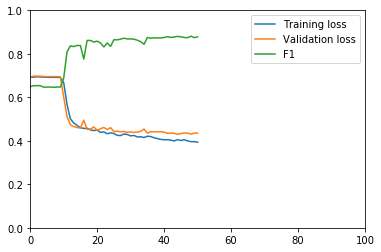

In [23]:
best_score = 0
mb = master_bar(range(EPOCHS))
mb.names = ['Training loss', 'Validation loss', 'F1']
training_losses = []
validation_losses = []
f1_scores = []
x = []

train_step = math.ceil(len(train_x)*1.0/BATCH_SIZE)
val_step = math.ceil(len(validation_x)*1.0/BATCH_SIZE)
for epoch in mb:
    
    # initializing the hidden state at the start of every epoch
    # initally hidden is None
    hidden = model.reset_states()
    x.append(epoch)
    
    ### TODO 6.1
    # Huấn luyện bằng hàm epoch_training()
    # Sử dụng tập train_dataset
    ### START CODE HERE
    training_loss = epoch_training(model, train_dataset, global_step, mb, train_step)
    ### END CODE HERE
    
    # Báo cáo kết quả train/huấn luyện
    mb.write('Finish train epoch {} with loss {:.4f}'.format(epoch, training_loss))
    training_losses.append(training_loss)
    
    ### TODO 6.2
    # Đánh giá kết quả trên tập validation_dataset
    # bằng hàm epoch_evaluation()
    ### START CODE HERE
    
    valid_loss, valid_score = epoch_evaluation(model, validation_dataset, mb, val_step)
    ### END CODE HERE
    
    # Báo cáo kết quả validate
    mb.write('Finish validate epoch {} with loss {:.4f}, F1-score {:.4f}'.format(epoch,valid_loss, valid_score))
    validation_losses.append(valid_loss)
    f1_scores.append(valid_score)
    
    # Cập nhật đồ thị
    global_step.assign_add(1)
    mb.update_graph([[x, training_losses], [x, validation_losses], [x, f1_scores]], [0,EPOCHS], [0,1])
    
    # Update score và lưu model có score tốt nhất
    if best_score < valid_score:
        mb.write(">>> Improved F1-score from {:.4f} to {:.4f}".format(best_score, valid_score))
        # Update best_score
        best_score = valid_score
        # Save model
        model.save_weights(checkpoint_prefix.format(score=valid_score))

In [24]:
model.summary()

Model: "sentiment_analysis"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  multiple                  219648    
_________________________________________________________________
lstm_1 (LSTM)                multiple                  131584    
_________________________________________________________________
lstm_2 (LSTM)                multiple                  131584    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  258       
Total params: 483,074
Trainable params: 483,074
Non-trainable params: 0
__________________________________________